# ✈️ **Airline Passenger Satisfaction Data Analysis**

## 📁 Patika.dev - Kız Başına Data Analysis Bootcamp - Final Project-1

This project focuses on analysis and visualization of Airline Passenger Satisfaction data set, obtained from Kaggle. Parameters related to passenger satisfaction are investigated and key predictors of satisfaction are interpreted. Pandas and NumPy libraries were utilized for data analysis, Seaborn was used for visualization.

###**1. Choice of Data Set**



This data set was selected due to the variety of categorical and numerical parameters it has. Additionally, presence of outliers and missing values renders this data set closer to real-life cases.

#### **1.1. Data Overview**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/train.csv')

**Dimensions of the data (rows, columns)**

In [3]:
df.shape

(103904, 25)

**First 5 rows**

In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


**Last 5 rows**

In [5]:
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


**Column names, data types, non-null entry counts**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

###**2. Descriptive Statistics**


**Initial cleanup-removing unnecessary columns**


```Unnamed: 0``` column is identical to index labels, therefore, it is not detrimental to analysis.

In [7]:
df_new=df.drop('Unnamed: 0',axis=1)
df_new

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


```id``` column data type is integer, however, it is not a parameter that will produce meaningful statistical features. Therefore, it can be excluded from statistical analysis.

In [8]:
df_new_stat=df_new.drop('id',axis=1)


In [9]:
numeric_columns=df_new_stat.select_dtypes(include=['int64','float64']).columns
categorical_columns=df_new_stat.select_dtypes(include=['object']).columns

In [10]:
numeric_columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [11]:
categorical_columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object')

**Although columns that hold scores for a given parameter that the passengers evaluate are numeric values, they can be processed as categorical values, as an indicator of satisfaction level. Therefore, storing them separately from true numeric values would be helpful in further analyses.**

In [12]:
true_numeric_cols=['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [13]:
score_numeric_cols=['Inflight wifi service','Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

In [14]:
df_new_stat.describe().round(2)

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103904.00,103594.00
mean,39.38,1189.45,2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.30,3.64,3.29,14.82,15.18
std,15.11,997.15,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.23,38.70
min,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,27.00,414.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,3.00,3.00,2.00,0.00,0.00
50%,40.00,843.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,4.00,4.00,3.00,4.00,3.00,0.00,0.00
75%,51.00,1743.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,5.00,4.00,12.00,13.00
max,85.00,4983.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,1592.00,1584.00


###**3. Missing Values**


**Missing value count in each column:**

In [15]:
missing_values=df_new.isnull().sum()
missing_values

,0
id,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0


There are missing values only in ```Arrival Delay in Minutes``` column. To investigate further, percentage of missing values is calculated.

In [16]:
total_value_count=len(df_new)

missing_percentage = (missing_values / total_value_count) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Total Value Count': total_value_count,
    'Missing Percentage (%)': missing_percentage
})

missing_summary.loc['Arrival Delay in Minutes'].round(2)


,Arrival Delay in Minutes
Missing Values,310.0
Total Value Count,103904.0
Missing Percentage (%),0.3


As it can be seen, missing values do not constitute a majority of available data in Arrival Delay in Minutes column. They are only 0.3% of the total data.

Since missing values are only present in one variable, which is related to delay duration, it can be speculated that passengers did not fill this question when there was minor or no delay. Let's further investigate the data in this column.

Below is a summary of values that are 0, greater than 0 and null in the entire column.

In [17]:
zero_values=(df['Arrival Delay in Minutes']==0).sum()
over_zero_values=(df['Arrival Delay in Minutes']>0).sum()
missing_values=df['Arrival Delay in Minutes'].isnull().sum()
total_value_count=len(df['Arrival Delay in Minutes'])
no_delay_percentage=(zero_values/total_value_count)*100
delay_percentage=(over_zero_values/total_value_count)*100
missing_percentage=(missing_values/total_value_count)*100
delay_report=pd.DataFrame({
    'On-time Arrivals':zero_values,
    'Delayed Arrivals':over_zero_values,
    'Missing Values':missing_values,
    'Total Value Count':total_value_count,
    'No Delay Percentage(%)':no_delay_percentage,
    'Delay Percentage(%)':delay_percentage,
    'Missing Percentage(%)':missing_percentage},index=['Arrival Delay in Minutes'])
delay_report.round(2).T

,Arrival Delay in Minutes
On-time Arrivals,58159.00
Delayed Arrivals,45435.00
Missing Values,310.00
Total Value Count,103904.00
No Delay Percentage(%),55.97
Delay Percentage(%),43.73
Missing Percentage(%),0.30


As it can be seen, number of on-time arrivals (value==0) is greater than number of arrivals with delay (value>0).


We also see that sum of on-time arrivals, delayed arrivals and missing values is equal to the total number of rows in Arrical Delay in Minutes column. This serves as a double check that there are no invalid entries such as negative values, which would still be integers but meaningless in terms of minutes.

We can further investigate by adding the descriptive statistics to this table.

In [18]:
std=df['Arrival Delay in Minutes'].std()
mean=df['Arrival Delay in Minutes'].mean()
median=df['Arrival Delay in Minutes'].median()
min=df['Arrival Delay in Minutes'].min()
max=df['Arrival Delay in Minutes'].max()
q1=df['Arrival Delay in Minutes'].quantile(0.25)
q3=df['Arrival Delay in Minutes'].quantile(0.75)
mod=df['Arrival Delay in Minutes'].mode()[0]
delay_report[['Standard Deviation','Mean','Median','Mod','Minimum','Maximum','First Quartile','Third Quartile']]=[std,mean,median, mod, min,max,q1,q3]
delay_report.round(2).T

,Arrival Delay in Minutes
On-time Arrivals,58159.00
Delayed Arrivals,45435.00
Missing Values,310.00
Total Value Count,103904.00
No Delay Percentage(%),55.97
Delay Percentage(%),43.73
Missing Percentage(%),0.30
Standard Deviation,38.70
Mean,15.18
Median,0.00


As it can be seen, apart from the outliers, most arrival delay values are skewed towards values below 13-15 minutes. Therefore, majority of flights arrive with either without or minimal delay.

There are various approaches that can be employed to handle missing values.


*   **Removing Rows with Missing Values**: Excluding the missing values from analyses conducted on 'Arrival Delay in Minutes' column.
*   **Mean Imputation**: Mean value can be assigned to the missing values. This is not the best option for this case, since the mean is affected by the extreme values and outliers in the column. The data is not normally distributed.
*   **Median Imputation**: Median value can be assigned to the missing values. This might be the most suitable option for this case, since the values are skewed to 0.
*   **Mode Imputation**: Mode value can be assigned to the missing values. For this data, it yields the same outcome as median imputation, since the values are skewed to 0 and the mode value is also 0.
*   **Forward/Backward Imputation**: Missing values can be filled with previous or next available non-null values. This is not a viable option here, since the delay values do not follow a sequential order.
*   **Interpolation**: Missing values can be estimated based on the patterns of the existing non-null values, such as linear or quadratic relationships. This is not applicable here since the delay values do not follow such a pattern.



>Hence, the most suitable approach for this case is **Median/Mode Imputation**. This can be justified with a bit of speculation. It is concievable that passengers who haven't experienced delay or only had minimal delay may have skipped the Arrival Delay in Minutes question. Conversely, it is less likely that passengers who have experienced significant delay not to enter these values to the survey. Given data also illustrates that arrival delay doesn't often happen at extreme durations. Therefore, it is safe to assume no delay for the missing values.

In [19]:
#create a copy of the data frame so that original is not lost
df_new_filled=df_new_stat.copy()

#replace the missing values in 'Arrival Delay in Minutes' column with its median, which is 0
df_new_filled['Arrival Delay in Minutes']=df_new_filled['Arrival Delay in Minutes'].fillna(median)

#check if there are still missing values
df_new_filled.isnull().sum()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


###**4. Outlier Analysis**


There are various ways to detect outliers in a data set. One of the most common approaches is to use **Interquartile Range**. This method defines outliers as values that are below the lower quartile or above upper quartile, by a difference of 1.5*(interquartile range).

In [20]:
Q1 = df_new_filled[numeric_columns].quantile(0.25)
Q3 = df_new_filled[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = df_new_filled[(df_new_filled[numeric_columns] < Q1 - 1.5 * IQR) | (df_new_filled[numeric_columns] > Q3 + 1.5 * IQR)]
outliers.count()

,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,2291
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


Another approach uses **Z-scores**. Z-score is a measure of distance from standard deviation. Any value that has z-score greater than 3 or less than -3 can be considered an outlier.

In [21]:
#calculation of z-score:
z=np.abs((df_new_filled[numeric_columns]-df_new_filled[numeric_columns].mean())/df_new_filled[numeric_columns].std())
outliers_z=df_new_filled[(z>3)]
outliers_z.count()

,0
Gender,0
Customer Type,0
Age,17
Type of Travel,0
Class,0
Flight Distance,58
Inflight wifi service,0
Departure/Arrival time convenient,0
Ease of Online booking,0
Gate location,0


To compare both calculations, both tables can be merged.

In [22]:
outliers_combined=pd.concat([outliers.count(),outliers_z.count()],axis=1)
outliers_combined.columns=['Interquartile Range','Z-Score']
outliers_combined

,Interquartile Range,Z-Score
Gender,0,0
Customer Type,0,0
Age,0,17
Type of Travel,0,0
Class,0,0
Flight Distance,2291,58
Inflight wifi service,0,0
Departure/Arrival time convenient,0,0
Ease of Online booking,0,0
Gate location,0,0


In [23]:
total_value_count_2=len(df_new_filled)
outliers_combined['Percentage of IQR Outliers']=((outliers_combined['Interquartile Range'])/total_value_count_2)*100
outliers_combined['Percentage of Z-Score Outliers']=((outliers_combined['Z-Score'])/total_value_count_2)*100
outliers_combined.round(2)

,Interquartile Range,Z-Score,Percentage of IQR Outliers,Percentage of Z-Score Outliers
Gender,0,0,0.00,0.00
Customer Type,0,0,0.00,0.00
Age,0,17,0.00,0.02
Type of Travel,0,0,0.00,0.00
Class,0,0,0.00,0.00
Flight Distance,2291,58,2.20,0.06
Inflight wifi service,0,0,0.00,0.00
Departure/Arrival time convenient,0,0,0.00,0.00
Ease of Online booking,0,0,0.00,0.00
Gate location,0,0,0.00,0.00


As can be seen, there are drastic differences between both approaches. However, based on the initial descriptive statistics on this data set, it is apparent that the data does not have normal distribution. Therefore, z-score based approach falls short in identifying outliers. Box plots of the columns possessing outliers can illustrate this situation better.

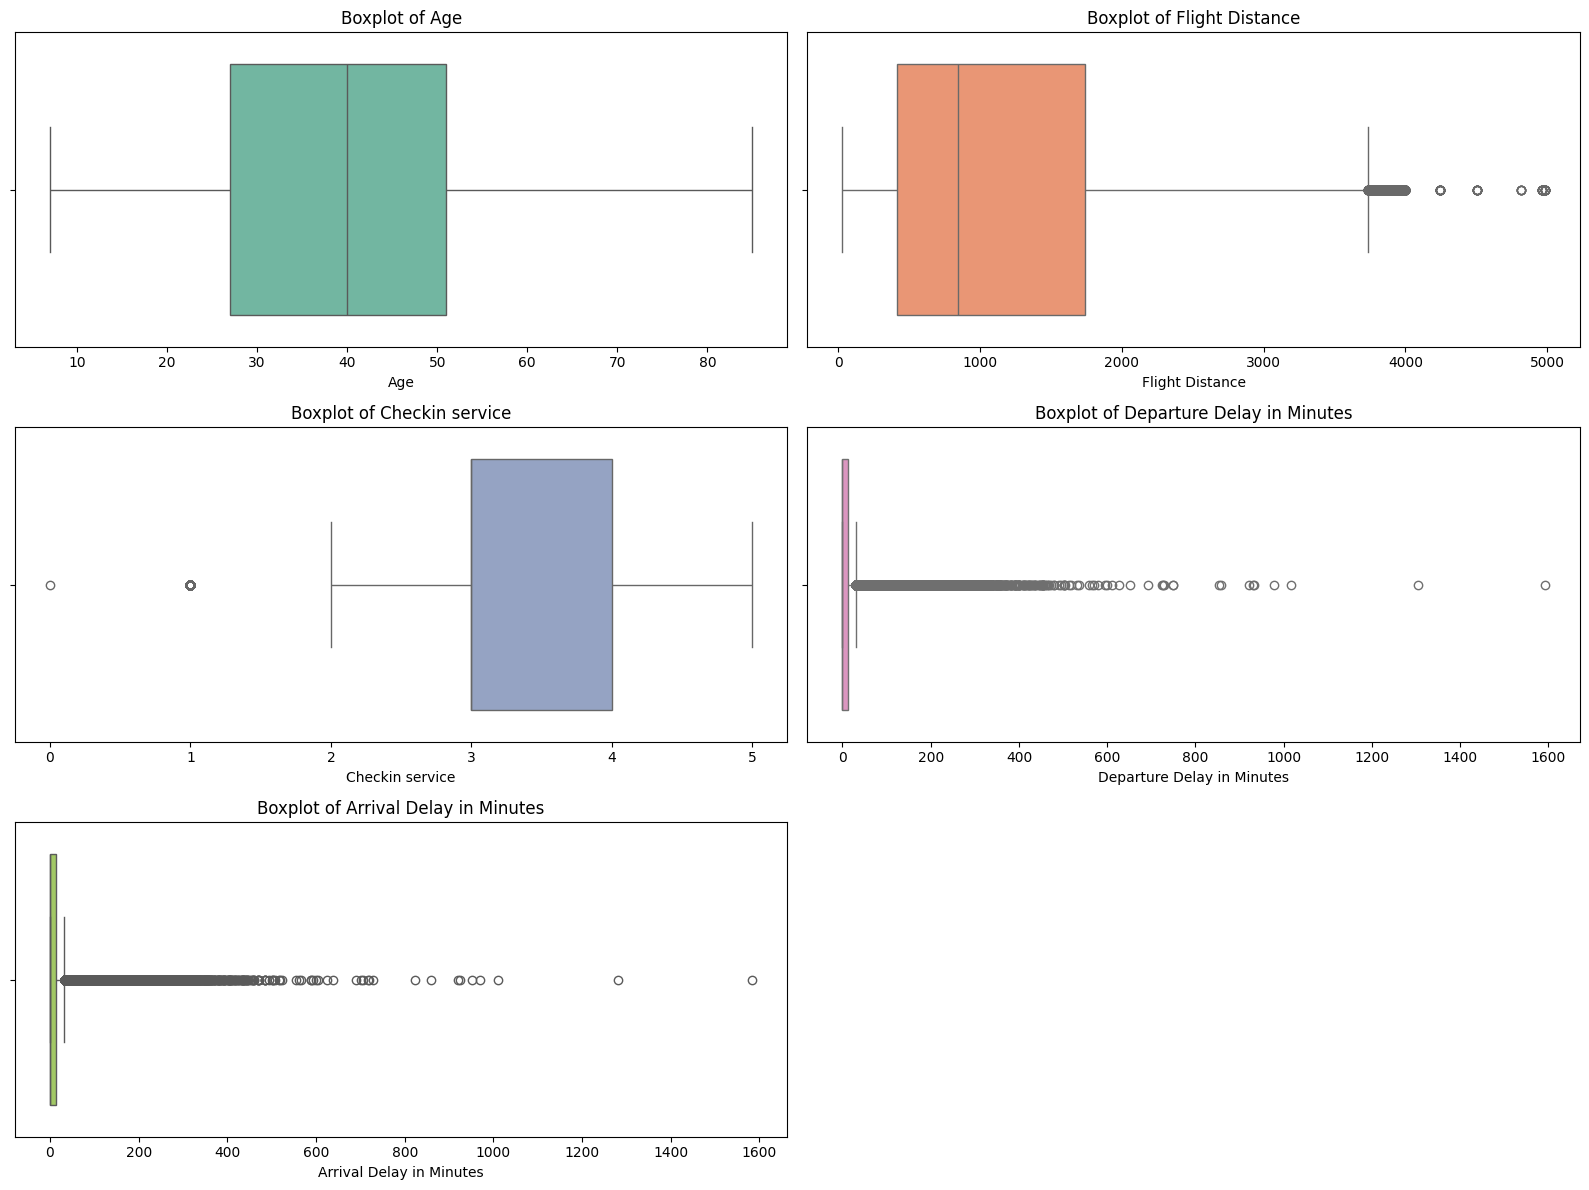

In [24]:
outlier_columns = ['Age','Flight Distance', 'Checkin service', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

plt.figure(figsize=(16, 12))
colors = sns.color_palette("Set2", n_colors=len(outlier_columns))
for i in range(len(outlier_columns)):
    column=outlier_columns[i]
    plt.subplot(3, 2, i+1)
    # Use specific color from the palette
    sns.boxplot(x=df_new_filled[column], color=colors[i])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

As it can be seen, all parameters except **Age** have a clear non-normal distribution.

**Flight Distance** has outliers above the third quartile.

**Checkin service** outliers lie below the first quartile. These outliers seem to concentrate on score 1. Most passengers appear to have evaluated the checkin service within 2-5 range, however, a significant group has voted 1. Further investigation on those who marked 1 for this parameter might reveal whether they have something in common.

**Arrival/Departure Delay in Minutes** have similar trends, both have outliers and extreme values spanning a large range above the third quartile. Based on this trend, it might be more accurate to divide the data in sections or groups for delay-related analyses. Treating such a heterogeneous data range as a single homogeneous one could lead to faulty interpretations.


###**5. Visualization**


#### **5.1. Visualization of truly numerical data**

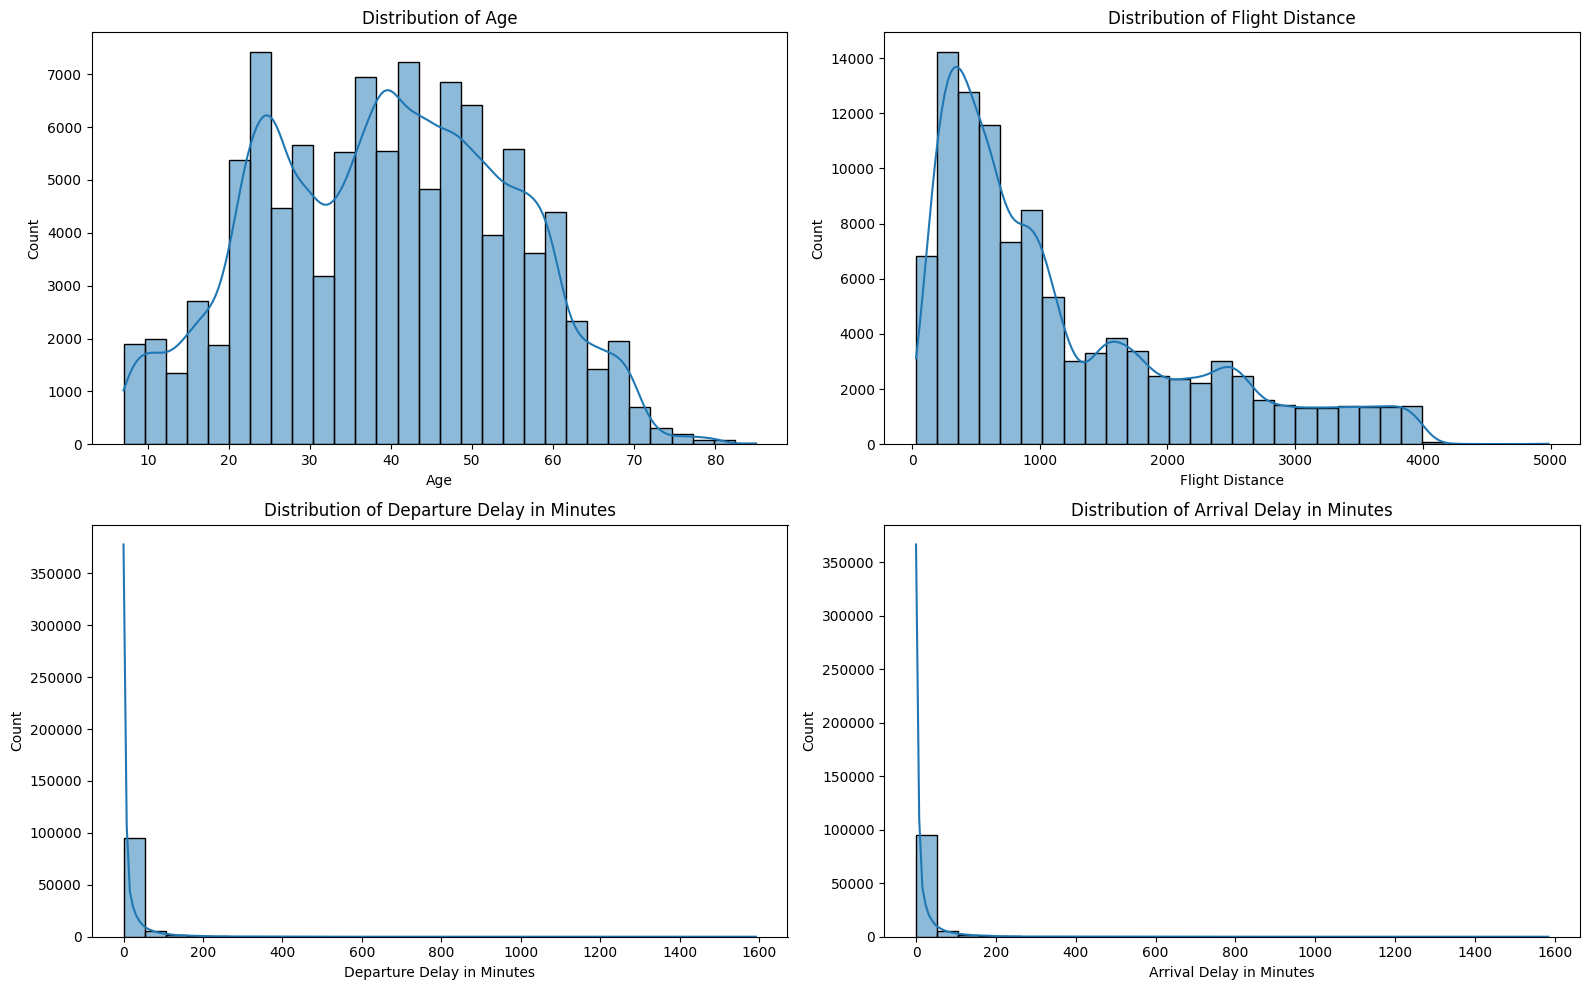

In [25]:
plt.figure(figsize=(16, 10))
for i, column in enumerate(true_numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_new_filled[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

The plots above exhibit the non-normal distribution of parameters that have continuous numerical data.

**Age** values don't have normal distribution but it is the closest parameter to a bell curve. Number of passengers aged 30-40 would be higher in a typical Gaussian data set.

**Flight Distance**, **Departure Delay** and **Arrival Delay** values are all right skewed, they lean left. This is in line with generic expectations from airlines. In any given airport, it is expected that flights to closer regions are scheduled more frequently. Similarly, delays are unwanted situations, so they are also expected to occur less frequently.

#### **5.2. Visualization of distribution of satisfaction scores**

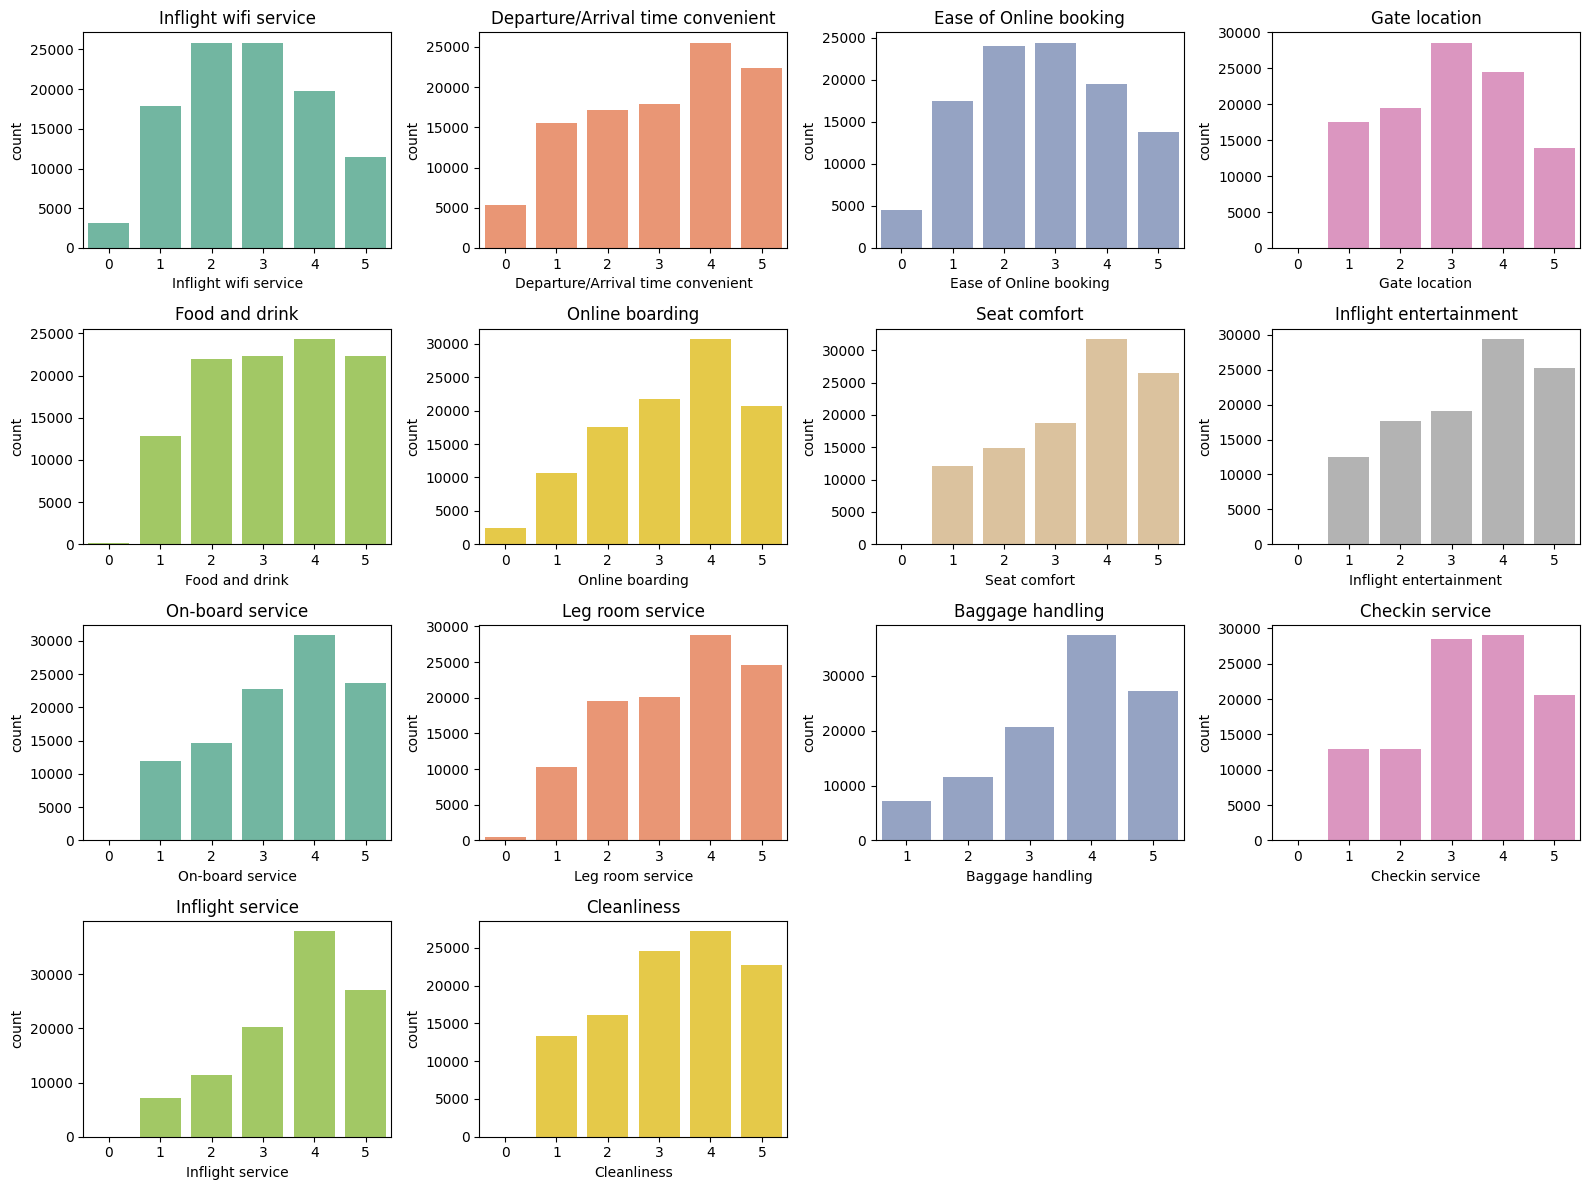

In [26]:

plt.figure(figsize=(16, 12))
colors = sns.color_palette("Set2", n_colors=len(score_numeric_cols))
for i in range(len(score_numeric_cols)):
    col=score_numeric_cols[i]
    plt.subplot(4, 4, i + 1)
    sns.countplot(data=df_new_filled, x=col, color=colors[i])
    plt.title(col)

plt.tight_layout()
plt.show()


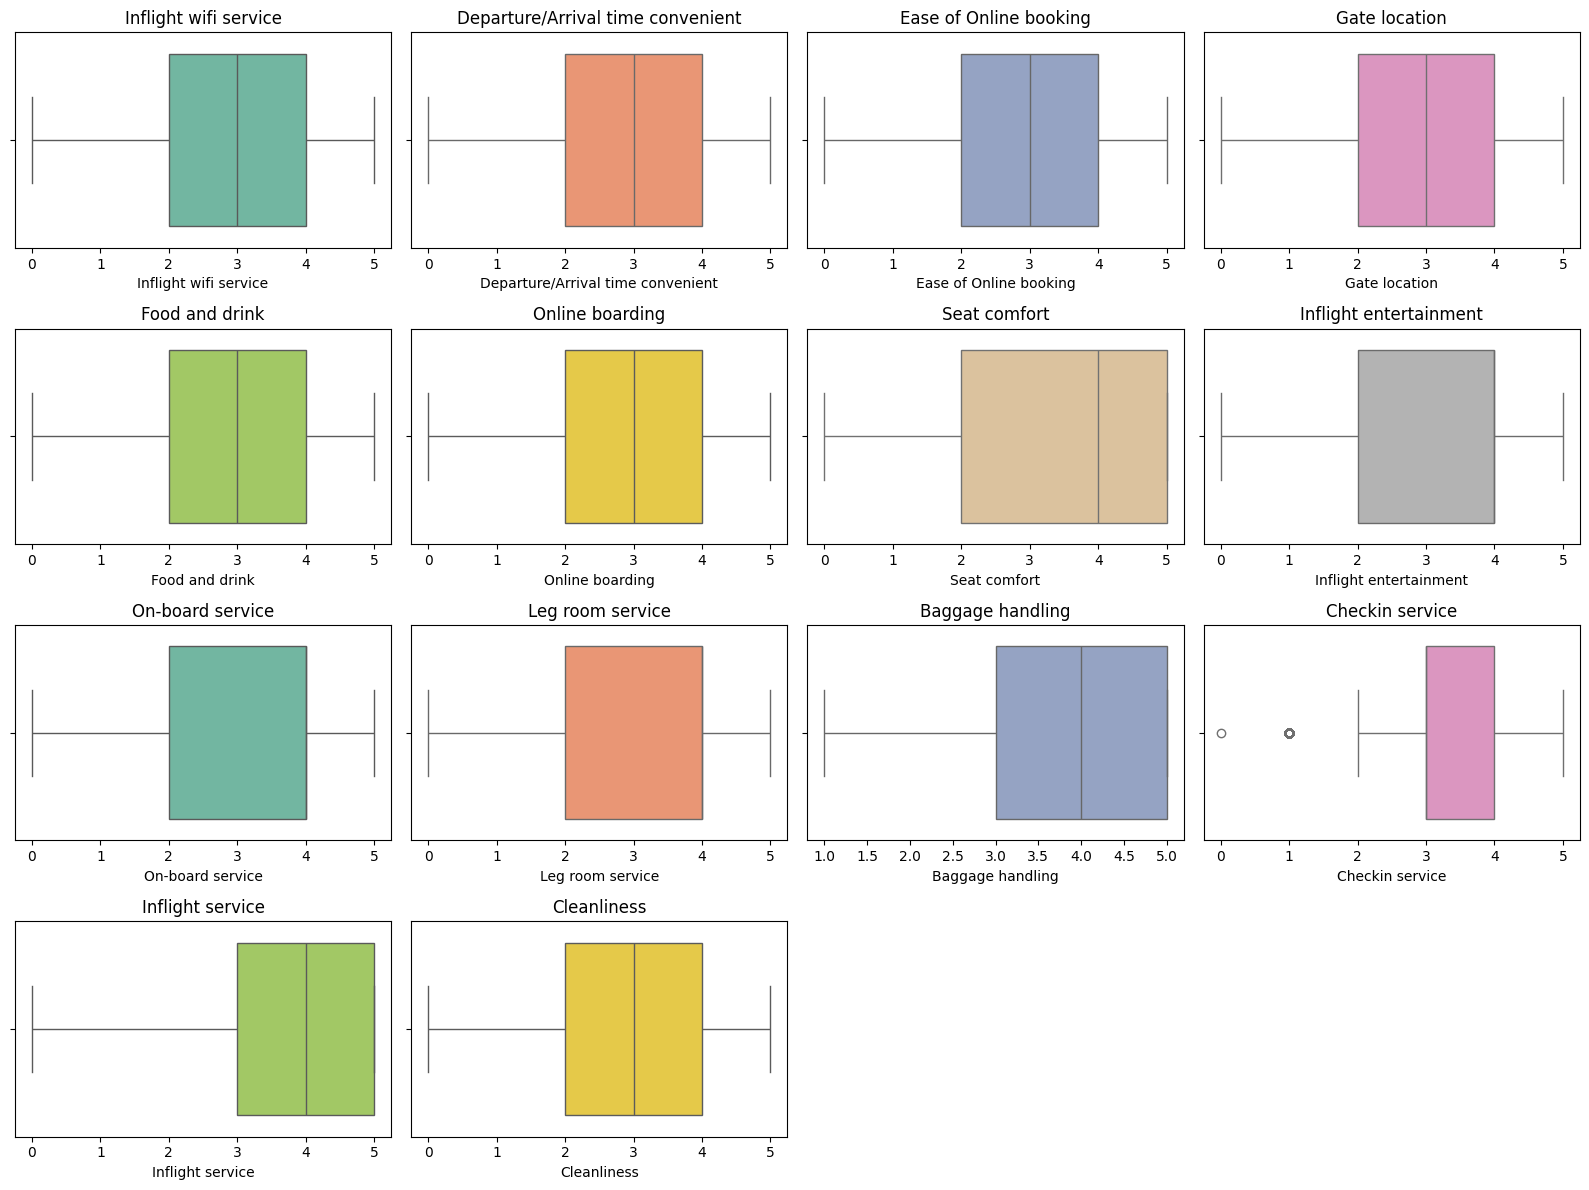

In [27]:
plt.figure(figsize=(16, 12))
colors = sns.color_palette("Set2", n_colors=len(score_numeric_cols))
for i in range(len(score_numeric_cols)):
    col=score_numeric_cols[i]
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df_new_filled, x=col, color=colors[i])
    plt.title(col)

plt.tight_layout()
plt.show()

#### **5.3. Visualization of categorical data**

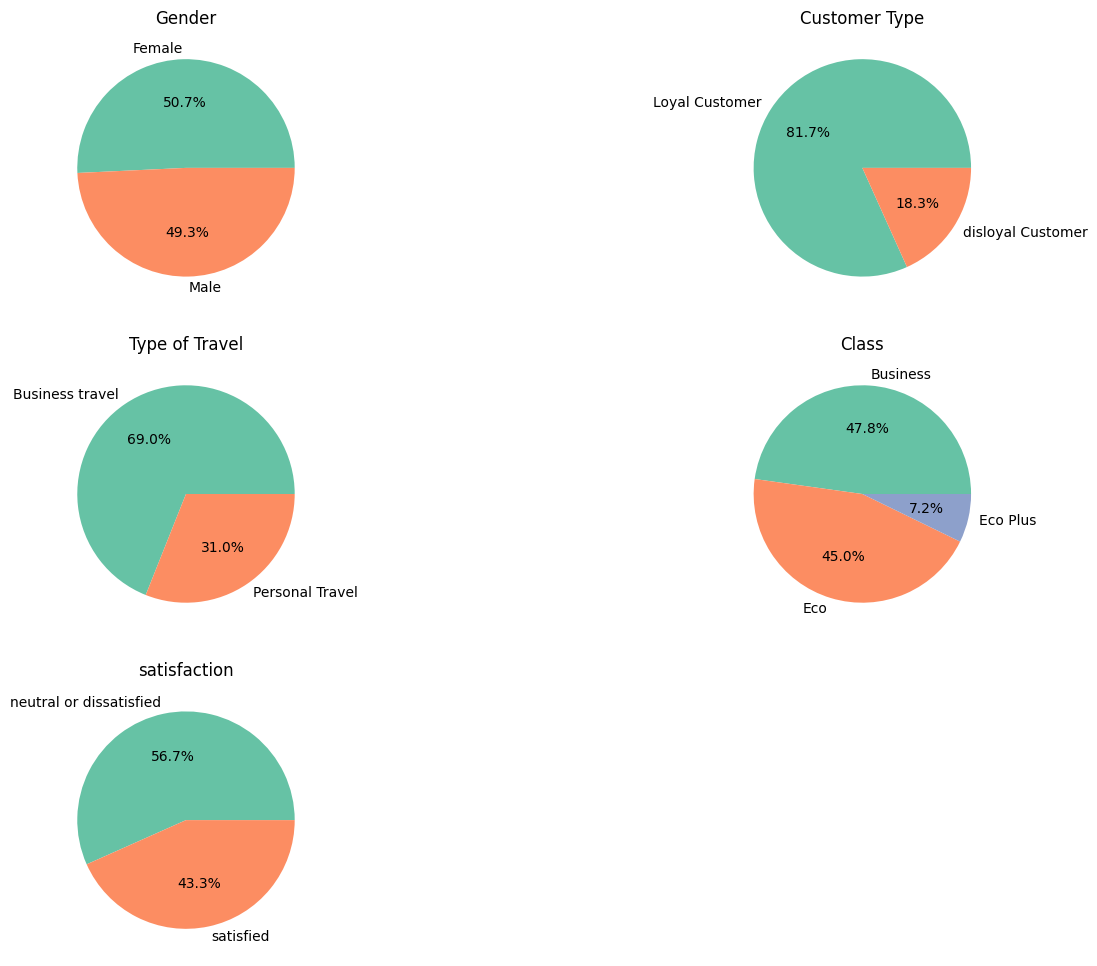

In [28]:
plt.figure(figsize=(16, 12))
for i in range(len(categorical_columns)):
    catcol=categorical_columns[i]
    plt.subplot(3, 2, i + 1)
    plt.pie(df_new_filled[catcol].value_counts(), labels=df_new_filled[catcol].value_counts().index, autopct='%1.1f%%',colors=sns.color_palette("Set2"))
    plt.title(catcol)
plt.show()


#### **5.3. Further Visualizations**

##### **Class vs Satisfaction**

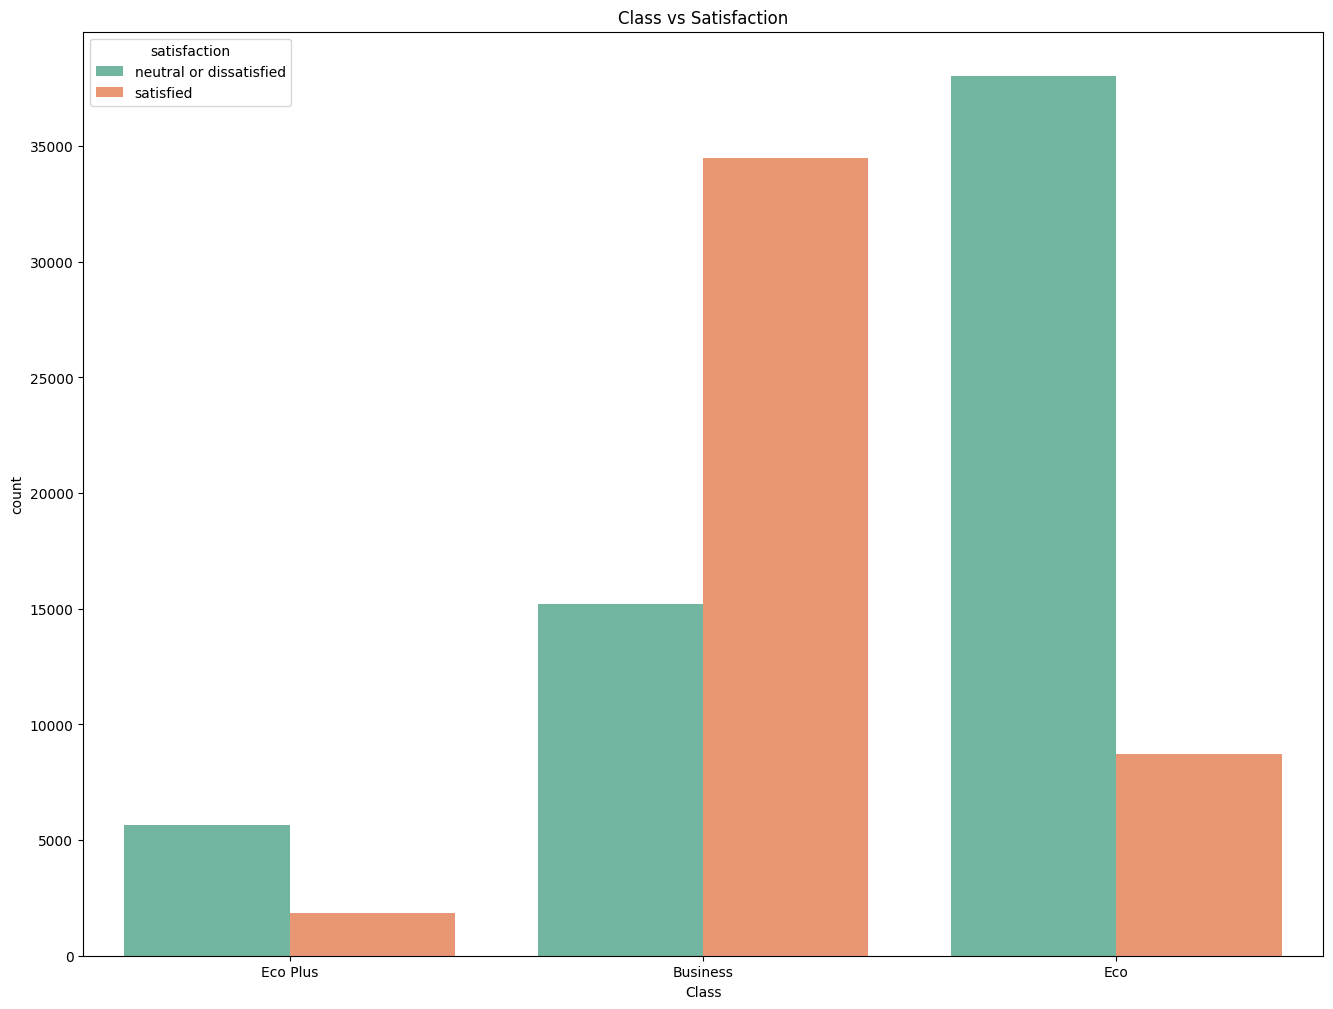

In [33]:
plt.figure(figsize=(16, 12))
sns.countplot(data=df_new_filled, x='Class', hue='satisfaction', palette='Set2')
plt.title('Class vs Satisfaction')
plt.show()

There is a clear distinction between satisfaction leves of Business and Eco classes. Only in Business class is the satisfied customer number higher than the dissatisfied ones.

##### **Customer Type vs Satisfaction**

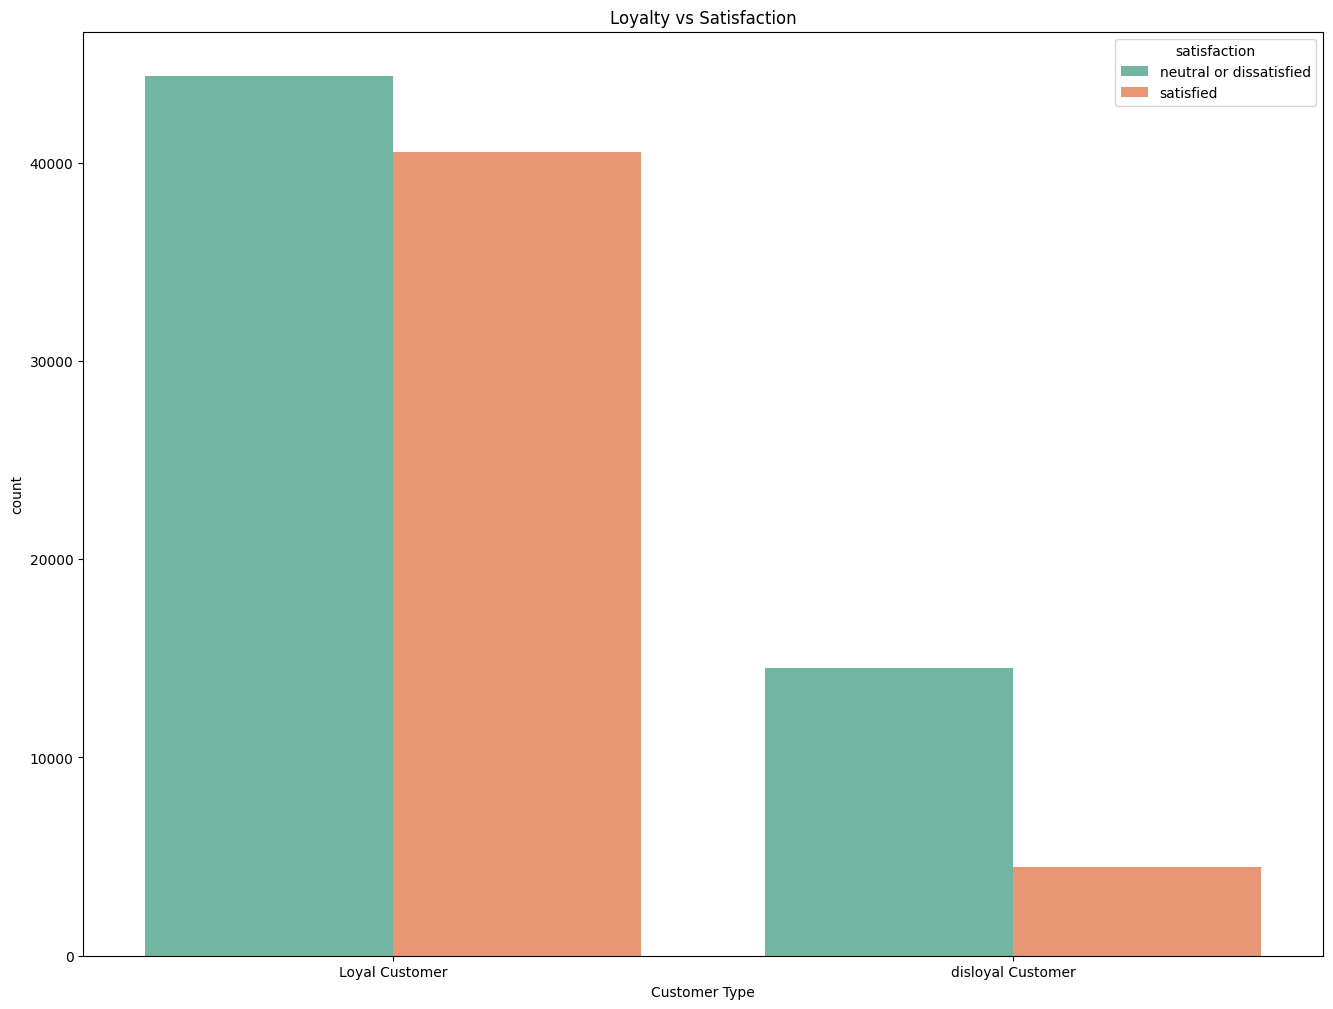

In [30]:
plt.figure(figsize=(16, 12))
sns.countplot(data=df_new_filled, x='Customer Type', hue='satisfaction', palette='Set2')
plt.title('Loyalty vs Satisfaction')
plt.show()

Although loyal customer count is much higher than disloyal customer count, both groups have a higher number of dissatisfied members. Ratio of dissatisfied customers to satisfied ones is higher in disloyal customer, which is plausible since loyal customers are expected to have a higher ratio of satisfied passengers, otherwise their consuming behavior wouldn't favor the selected airline.

##### **Gender vs Satisfaction**

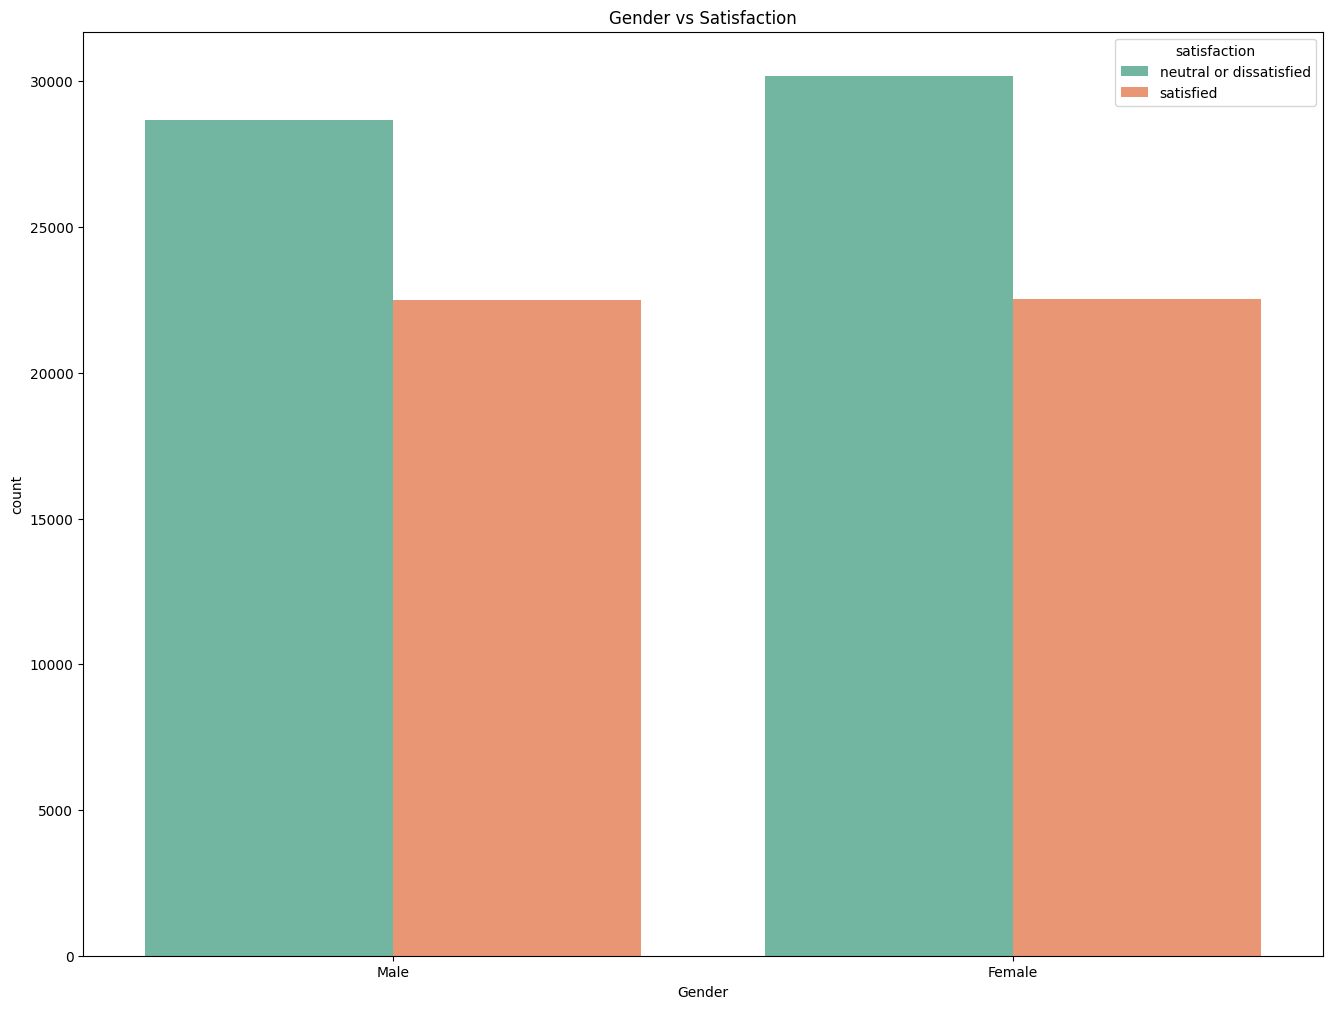

In [31]:
plt.figure(figsize=(16, 12))
sns.countplot(data=df_new_filled, x='Gender', hue='satisfaction', palette='Set2')
plt.title('Gender vs Satisfaction')
plt.show()

Both genders have similar distribution of satisfied and dissatisfied members. By a stretch, this could be a positive indicator of equal treatment of genders in this airline. It might suggest that there were no significant issues that made a particular gender feel uncomfortable, particularly women. Such instances could be unavailability of privacy for breastfeeding, absence of utilities in bathrooms, lack of security from airline employees or other passengers.

### **6. Further Analysis**

#### **6.1. Correlation Analysis for Numerical Values**

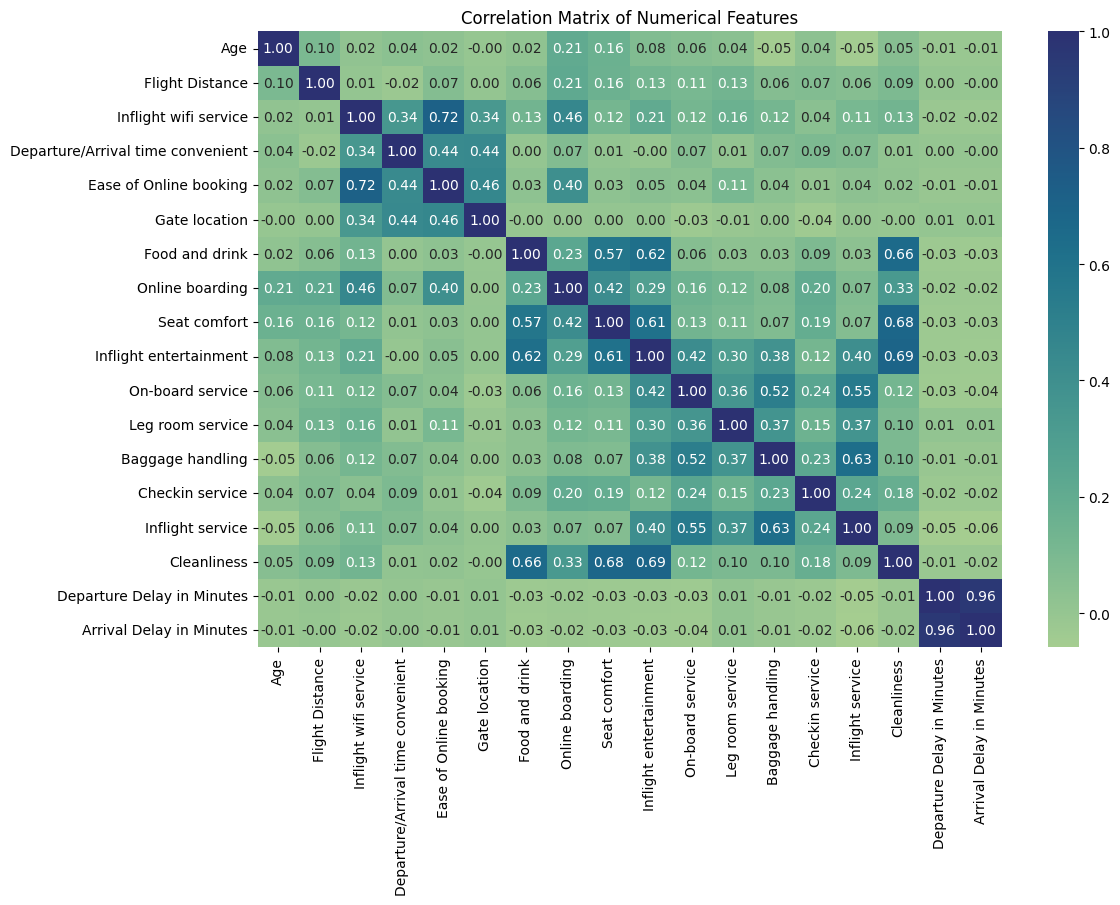

In [32]:
correlation_matrix = df_new_filled.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Most numerical values don't seem to have a strong correlation. Only arrival and departure delay values are strongly correlated, which is expected since delayed departure can bring about delayed arrival. We can also see that arrival and departure delay values have negative correlation with the rest of the parameters, which are composed of satisfaction scores.